<a href="https://colab.research.google.com/github/viktor1181/CNN/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.preprocessing import image
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
# Размер мини-выборки
batch_size = 128
# Количество классов изображений
nb_classes = 10
# Количество эпох для обучения
nb_epoch = 25
# Размер изображений
img_rows, img_cols = 32, 32
# Количество каналов в изображении: RGB
img_channels = 3
# Названия классов из набора данных CIFAR-10
classes=['самолет', 'автомобиль', 'птица', 'кот', 'олень', 'собака', 'лягушка', 'лошадь', 'корабль', 'грузовик']

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


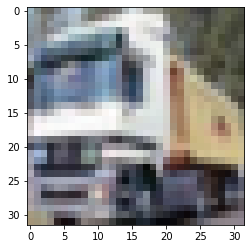

Номер класса: [9]
Тип объекта: грузовик


In [4]:
n = 1
plt.imshow(X_train[n])
plt.show()
print("Номер класса:", y_train[n])
print("Тип объекта:", classes[y_train[n][0]])

In [ ]:
X_train

In [5]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [ ]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [6]:
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [7]:
# Создаем последовательную модель
model = Sequential()
# Первый сверточный слой
model.add(Conv2D(32, (3, 3), padding='same',
                        input_shape=(32, 32, 3), activation='relu'))
# Второй сверточный слой
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
# Первый слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
# Слой регуляризации Dropout
model.add(Dropout(0.25))

# Третий сверточный слой
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
# Второй слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
# Слой регуляризации Dropout
model.add(Dropout(0.25))
# Слой преобразования данных из 2D представления в плоское
model.add(Flatten())
# Полносвязный слой для классификации
model.add(Dense(512, activation='relu'))
# Слой регуляризации Dropout
model.add(Dropout(0.5))
# Выходной полносвязный слой
model.add(Dense(nb_classes, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 64)          0

In [8]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [9]:
history = model.fit(X_train, Y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_split=0.1,
              shuffle=True,
              verbose=2)

Epoch 1/35
352/352 - 36s - loss: 1.6271 - accuracy: 0.4062 - val_loss: 1.2512 - val_accuracy: 0.5602
Epoch 2/35
352/352 - 3s - loss: 1.2194 - accuracy: 0.5633 - val_loss: 1.0532 - val_accuracy: 0.6286
Epoch 3/35
352/352 - 3s - loss: 1.0378 - accuracy: 0.6336 - val_loss: 0.9007 - val_accuracy: 0.6938
Epoch 4/35
352/352 - 3s - loss: 0.9276 - accuracy: 0.6733 - val_loss: 0.8222 - val_accuracy: 0.7150
Epoch 5/35
352/352 - 3s - loss: 0.8625 - accuracy: 0.6952 - val_loss: 0.7690 - val_accuracy: 0.7346
Epoch 6/35
352/352 - 3s - loss: 0.7930 - accuracy: 0.7204 - val_loss: 0.7371 - val_accuracy: 0.7444
Epoch 7/35
352/352 - 3s - loss: 0.7543 - accuracy: 0.7333 - val_loss: 0.7332 - val_accuracy: 0.7498
Epoch 8/35
352/352 - 3s - loss: 0.7169 - accuracy: 0.7459 - val_loss: 0.7158 - val_accuracy: 0.7524
Epoch 9/35
352/352 - 3s - loss: 0.6709 - accuracy: 0.7630 - val_loss: 0.6884 - val_accuracy: 0.7658
Epoch 10/35
352/352 - 3s - loss: 0.6379 - accuracy: 0.7757 - val_loss: 0.6862 - val_accuracy: 0.771

In [10]:
# Оцениваем качество обучения модели на тестовых данных
scores = model.evaluate(X_test, Y_test, verbose=0)
print("Точность работы на тестовых данных: %.2f%%" % (scores[1]*100))

Точность работы на тестовых данных: 77.74%


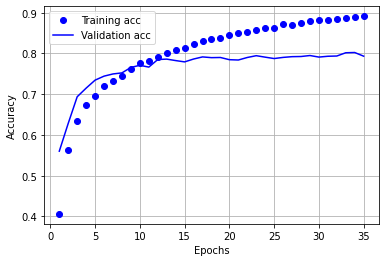

In [11]:
history_dict = history.history
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values) + 1)
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

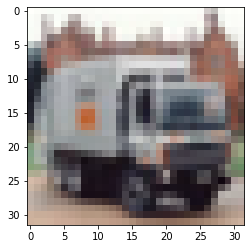

In [15]:
index=11
plt.imshow(X_test[index])
plt.show()

In [16]:
x = X_test[index]
x = np.expand_dims(x, axis=0)

In [17]:
prediction = model.predict(x)

In [18]:
print(prediction)

[[3.8763172e-14 3.8590747e-06 1.2386175e-17 1.9220353e-16 1.0450576e-21
  1.5159593e-18 5.4648644e-19 1.2164764e-20 2.7904085e-11 9.9999619e-01]]


**Запускаем распознавание**

In [19]:
prediction = np.argmax(prediction)
print(classes[prediction])

грузовик


In [20]:
print(classes[y_test[index][0]])

грузовик
